## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [1]:
# your answer here
# libraries
from scipy.stats import poisson, chisquare, norm, kstest, binom, chi2, chi2_contingency
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# setting the mu and the alpha
mu = 2.435
alpha = 0.05

# setting the observed values
observed = [35, 99, 104, 110, 62, 25, 10,  3]

# Fitting (this might not be the right word for it...) the data to the Poisson Distribuition
rugby = poisson(2.435)

# creating the expected scores for the Poisson Distribuition
expected = [rugby.pmf(x) * 448 for x in range(len(observed))]

# Chi2 testing
statistic, pvalue = chisquare(observed, expected)

# Conclusion:
print(f"We CAN say that the number of scores is NOT a Poisson variable at a {alpha} level.") \
if pvalue < alpha else print(f"We CANNOT reject the hypothesis that the number of scores is NOT a Poisson variable at a {alpha} level.")

We CANNOT reject the hypothesis that the number of scores is NOT a Poisson variable at a 0.05 level.


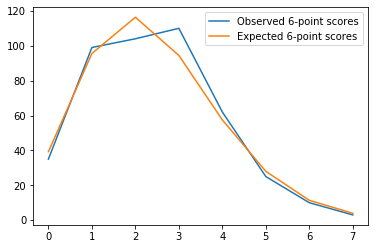

In [3]:
# plotting Observed vs Expected 6-point scores
plt.plot(observed, label = "Observed 6-point scores")
plt.plot(expected, label = "Expected 6-point scores")
plt.legend()
plt.show()

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [4]:
#your answer here
# setting the observed values
SATs = [852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063]

# setting previous years scores by N(985, 50)
norm_SATs = norm(985, 50)

# ks testing
statistic, pvalue = kstest(SATs, norm_SATs.cdf)

# Conclusion:
print(f"We CAN reject the Null Hypothesis at a {alpha} level.") \
if pvalue < alpha else print(f"We CANNOT reject the Null hypothesis at a {alpha} level.")

We CANNOT reject the Null hypothesis at a 0.05 level.


## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table2.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

In [5]:
# your code here
# setting the values
defectives = [0, 1, 3, 4]
observed = [32, 15, 9, 4]

# preparing the data for parallel processing as by: https://realpython.com/python-zip-function/
sample = zip(defectives, observed)

# calculating lambda
this_lambda = sum([d * o for d, o in list(sample)]) / sum(observed)

# creating poisson
defective_p = poisson(this_lambda)

# calculating the expected values
expected = [defective_p.pmf(x) * sum(observed) for x in defectives]

# Chi2 testing
statistic, pvalue = chisquare(observed, expected)

# Conclusion:
print(f"We CAN reject the Null Hypothesis at a {alpha} level.") \
if pvalue < alpha else print(f"We CANNOT reject the Null hypothesis at a {alpha} level.")

We CAN reject the Null Hypothesis at a 0.05 level.


## Question 4
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table3.png)


In [6]:
# your answer here

# creating a binomial w/n = 10, and p = 0.05
tires = binom(n = 10, p = alpha)

# setting the data
observed = [138, 53, 9]

#calculating the expected values
expected = [tires.pmf(x) * sum(observed) for x in range(len(observed))]

# Chi2 testing
statistis, pvalue = chisquare(observed, expected)

# Conclusion:
print(f"We CAN reject the Null Hypothesis at a {alpha} level.") \
if pvalue < alpha else print(f"We CANNOT reject the Null hypothesis at a {alpha} level.")

We CAN reject the Null Hypothesis at a 0.05 level.


## Question 5
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [7]:
#your answer here
# data:
observed = np.array([[32, 14, 6], [12, 22, 9]])

# chi2 test
achi2, pvalue, dof, expected = chi2_contingency(observed)

# Conclusion:
print(f"We CAN reject the Null Hypothesis at a {alpha} level.") \
if pvalue < alpha else print(f"We CANNOT reject the Null hypothesis at a {alpha} level.")

We CAN reject the Null Hypothesis at a 0.05 level.
